Explanatory Data Analysis
Exploratory Data Analysis (EDA) is the process of examining and analyzing datasets to summarize their main characteristics, often with the help of visualizations. It is typically the first step in data analysis, where analysts explore data patterns, detect anomalies, test assumptions, and check relationships between variables. EDA involves using descriptive statistics (like mean, median, variance) and graphical methods (such as histograms, box plots, scatter plots, and correlation heatmaps) to understand the structure of the data. The goal is not to confirm a hypothesis but to uncover insights, identify trends, and prepare the data for further modeling or decision-making.
Steps for an Exploratory Data Analysis (EDA) Project
1. Data Collection
Gather raw data from various sources like CSV/Excel files, APIs, or databases. Make sure the data aligns with the business problem and is comprehensive enough for analysis.
2. Data Cleaning
Prepare the dataset by addressing missing values, removing duplicates, and fixing inconsistencies in data formats. Standardize categories and deal with incorrect or extreme values so that the dataset becomes reliable.
3. Data Understanding
Explore the dataset to understand its structure. Check column data types, distinguish between numerical and categorical variables, and run sanity checks to ensure logical correctness (e.g., prices not being negative).
4. Univariate Analysis
Study each feature individually to understand its distribution and behavior. Use descriptive statistics and plots like histograms, boxplots, or frequency charts to gain insights about single variables.
5. Bivariate Analysis
Examine how two variables relate to each other. For instance, compare categorical variables with cross-tabulation, evaluate numeric vs. categorical data using grouped summaries, or assess correlations with scatter plots.
6. Multivariate Analysis
Look for interactions among multiple variables simultaneously. Use pivot tables, advanced visualizations like pairplots and heatmaps, and statistical techniques to identify deeper relationships.
7. Feature Engineering
Enhance the dataset by deriving new features such as ratios, time-based attributes, or aggregations. Convert categorical variables into numeric form (e.g., encoding) when preparing for machine learning models.
8. Outlier Detection
Identify unusual values that deviate significantly from the rest of the data. Assess whether they represent true anomalies or errors, and decide if they should be kept, adjusted, or removed.
9. Trend and Pattern Analysis
Look for underlying trends in the dataset, such as seasonality in time-series data or variations across categories like region or customer type. This helps uncover hidden insights.
10. Documentation & Reporting
Summarize findings clearly with visualizations, charts, and narrative explanations. Present actionable insights, highlight limitations of the data, and provide recommendations for next steps.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [15]:
df=pd.read_csv(r"C:\internship\Project2\udemy_output_All_Finance__Accounting_p1_p626.csv")

In [16]:
print(df.tail)

<bound method NDFrame.tail of             id                                              title  \
0       762616  The Complete SQL Bootcamp 2020: Go from Zero t...   
1       937678  Tableau 2020 A-Z: Hands-On Tableau Training fo...   
2      1361790             PMP Exam Prep Seminar -  PMBOK Guide 6   
3       648826         The Complete Financial Analyst Course 2020   
4       637930  An Entire MBA in 1 Course:Award Winning Busine...   
...        ...                                                ...   
13603  3005408                      מושגים בסיסיים באופציות חלק ב   
13604  3467284                            Programa de Integridade   
13605  3368222  Goodwill and Method of Calculating Goodwill (A...   
13606  3211345                                Poderoso Investidor   
13607  2935720         Acabou a Previdência e agora? -  Volume 03   

                                                     url  is_paid  \
0                     /course/the-complete-sql-bootcamp/     True   
1  

Data cleaning

In [17]:
print(df.isna().sum())

id                                 0
title                              0
url                                0
is_paid                            0
num_subscribers                    0
avg_rating                         0
avg_rating_recent                  0
rating                             0
num_reviews                        0
is_wishlisted                      0
num_published_lectures             0
num_published_practice_tests       0
created                            0
published_time                     0
discount_price__amount          1403
discount_price__currency        1403
discount_price__price_string    1403
price_detail__amount             497
price_detail__currency           497
price_detail__price_string       497
dtype: int64


In [18]:
df.duplicated().sum()

0

In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            13608 non-null  int64  
 1   title                         13608 non-null  object 
 2   url                           13608 non-null  object 
 3   is_paid                       13608 non-null  bool   
 4   num_subscribers               13608 non-null  int64  
 5   avg_rating                    13608 non-null  float64
 6   avg_rating_recent             13608 non-null  float64
 7   rating                        13608 non-null  float64
 8   num_reviews                   13608 non-null  int64  
 9   is_wishlisted                 13608 non-null  bool   
 10  num_published_lectures        13608 non-null  int64  
 11  num_published_practice_tests  13608 non-null  int64  
 12  created                       13608 non-null  object 
 13  p

In [20]:
print(df.describe())

                 id  num_subscribers    avg_rating  avg_rating_recent  \
count  1.360800e+04     13608.000000  13608.000000       13608.000000   
mean   1.681721e+06      2847.010435      3.923293           3.912242   
std    9.539271e+05      9437.865634      1.031304           1.039237   
min    2.762000e+03         0.000000      0.000000           0.000000   
25%    8.580862e+05        62.000000      3.800000           3.787315   
50%    1.623421e+06       533.000000      4.194440           4.181735   
75%    2.503720e+06      2279.500000      4.450000           4.452105   
max    3.486006e+06    374836.000000      5.000000           5.000000   

             rating   num_reviews  num_published_lectures  \
count  13608.000000  13608.000000            13608.000000   
mean       3.912242    243.169827               32.224794   
std        1.039237   1580.965895               42.766911   
min        0.000000      0.000000                0.000000   
25%        3.787315      7.000000    

In [ ]:

df.isnull().sum()


df_paid = df[df["is_paid"] == True]


df_paid = df_paid.dropna(subset=["price_detail__amount"])


Paid vs Free Courses

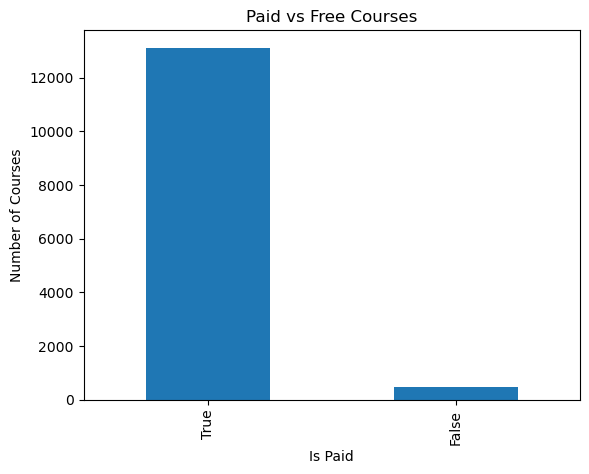

In [22]:
df["is_paid"].value_counts().plot(kind="bar")
plt.title("Paid vs Free Courses")
plt.xlabel("Is Paid")
plt.ylabel("Number of Courses")
plt.show()


Price Distribution

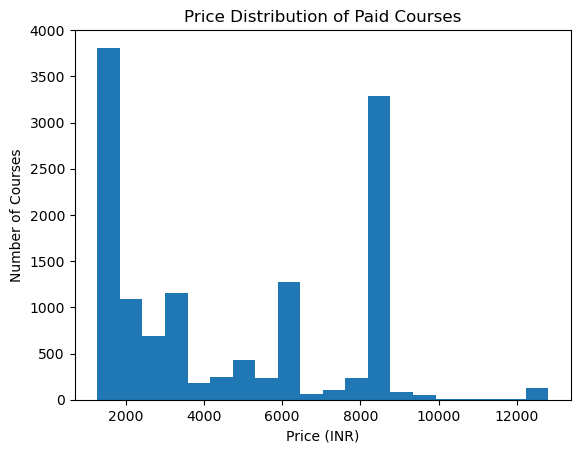

In [23]:
plt.hist(df_paid["price_detail__amount"], bins=20)
plt.title("Price Distribution of Paid Courses")
plt.xlabel("Price (INR)")
plt.ylabel("Number of Courses")
plt.show()


Rating Distribution

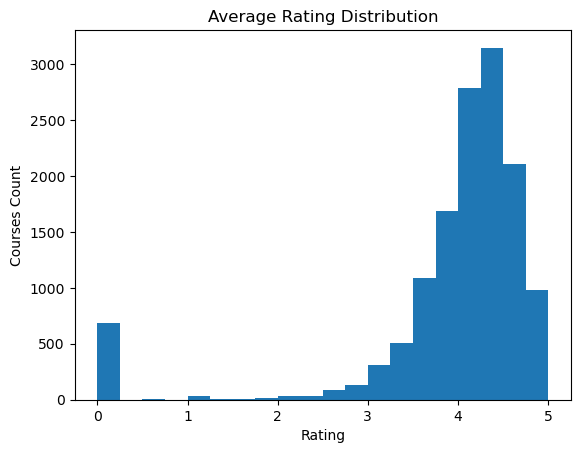

In [24]:
plt.hist(df["avg_rating"], bins=20)
plt.title("Average Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Courses Count")
plt.show()


Price vs Subscribers

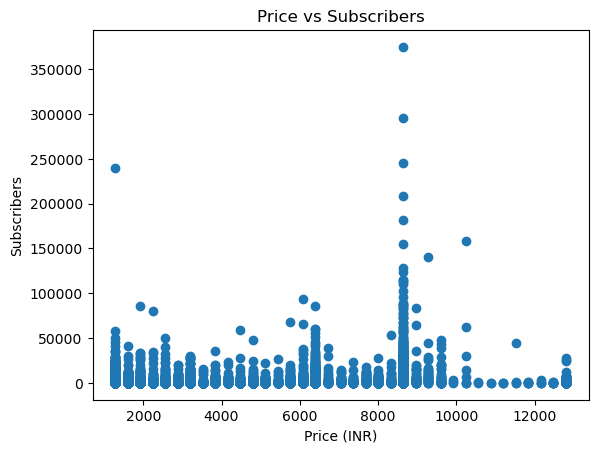

In [25]:
plt.scatter(df_paid["price_detail__amount"], df_paid["num_subscribers"])
plt.title("Price vs Subscribers")
plt.xlabel("Price (INR)")
plt.ylabel("Subscribers")
plt.show()


Rating vs Subscribers

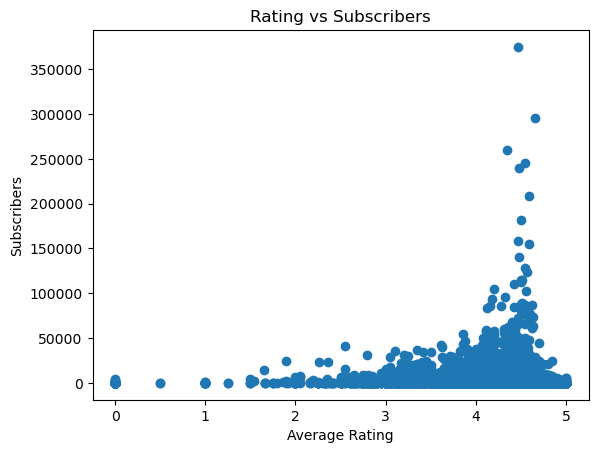

In [26]:
plt.scatter(df["avg_rating"], df["num_subscribers"])
plt.title("Rating vs Subscribers")
plt.xlabel("Average Rating")
plt.ylabel("Subscribers")
plt.show()


Paid vs Free Course Comparison

In [27]:
df.groupby("is_paid")[["num_subscribers", "avg_rating"]].mean()


,num_subscribers,avg_rating
is_paid,,
False,5861.286290,3.960125
True,2732.986577,3.921900


Course Length Analysis

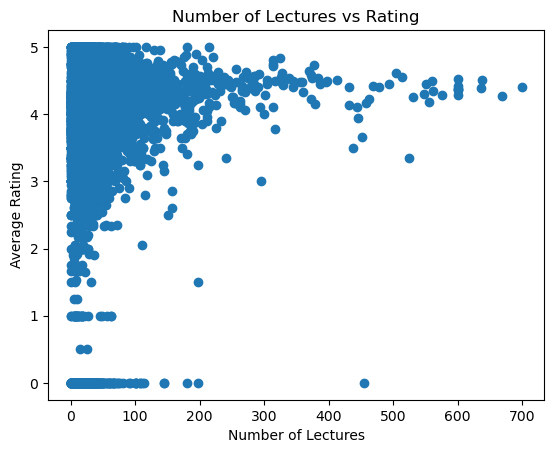

In [28]:
plt.scatter(df["num_published_lectures"], df["avg_rating"])
plt.title("Number of Lectures vs Rating")
plt.xlabel("Number of Lectures")
plt.ylabel("Average Rating")
plt.show()


Reviews vs Rating

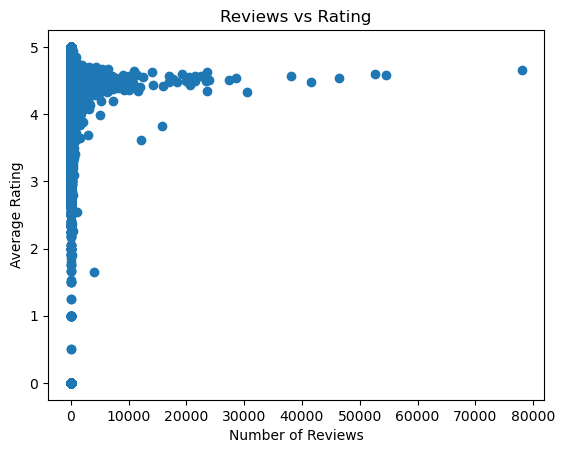

In [30]:
plt.scatter(df["num_reviews"], df["avg_rating"])
plt.title("Reviews vs Rating")
plt.xlabel("Number of Reviews")
plt.ylabel("Average Rating")
plt.show()


Key Insights

In [31]:
# Top 10 courses by subscribers
top_courses = df.sort_values("num_subscribers", ascending=False)[
    ["title", "num_subscribers", "avg_rating", "price_detail__amount"]
].head(10)

top_courses


,title,num_subscribers,avg_rating,price_detail__amount
4,An Entire MBA in 1 Course:Award Winning Busine...,374836,4.47080,8640.0
0,The Complete SQL Bootcamp 2020: Go from Zero t...,295509,4.66019,8640.0
11484,Stock Market Investing for Beginners,259888,4.34928,NaN
3,The Complete Financial Analyst Course 2020,245860,4.54407,8640.0
19,Deep Learning Prerequisites: The Numpy Stack i...,239309,4.47381,1280.0
1,Tableau 2020 A-Z: Hands-On Tableau Training fo...,209070,4.58956,8640.0
15,The Complete Financial Analyst Training & Inve...,182002,4.49571,8640.0
35,The Complete Presentation and Public Speaking/...,158654,4.46745,10240.0
2,PMP Exam Prep Seminar - PMBOK Guide 6,155282,4.59491,8640.0
22,"Introduction to Finance, Accounting, Modeling ...",140676,4.47580,9280.0


Udemy Finance & Accounting Courses Dataset

This exploratory data analysis was conducted to understand the structure, pricing, popularity, and performance of Udemy’s Finance & Accounting courses.

1. Course Type & Availability

Most courses in this category are paid, with free courses forming a smaller portion.

However, free courses attract high enrollments, indicating they are used mainly as entry-level or promotional content.

2. Pricing Insights

Course prices mostly lie between ₹1,600 and ₹3,200.

Very high-priced courses exist but are fewer and generally target niche or advanced learners.

Lower-priced courses tend to attract more subscribers than expensive ones.

3. Subscriber Behavior

Subscriber count is highly skewed:

Few courses have extremely high enrollments.

Most courses have moderate or low enrollments.

Courses with affordable pricing and strong ratings gain maximum traction.

4. Ratings & Reviews

Most courses are rated between 4.0 and 4.6, showing generally good content quality.

Courses with higher ratings usually have:

More subscribers

More reviews

Reviews act as a strong trust signal for new learners.

5. Course Length vs Quality

Courses with a moderate number of lectures perform better than extremely short or very long courses.

More content does not always mean better ratings — clarity and structure matter more than volume.